# Predictive Analytics by TensorFlow and Data Visualization for Euro Cup 2024

### Description:
This project aims to show advanced data analysis and machine learning techniques to analyze and predict outcomes for the Euro Cup 2024. By utilizing player statistics, team performance metrics, and TensorFlow's deep learning capabilities, we aim to provide insightful predictions and visualizations that enhance the understanding and enjoyment of the tournament.

### Source and Preparation of the Data:

Data are collected from https://www.kaggle.com/datasets/damirdizdarevic/uefa-euro-2024-players.

    Handle missing values (if any).
    One-hot encode categorical variables (e.g., position).
    Split the dataset into training and testing sets.
    Build and Train the Model:

We use TensorFlow/Keras to create and train a neural network model and evaluate it by MSE.



### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('euro2024_players.csv')

In [3]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


### Handling Missing Values

In [4]:
df.isnull().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [5]:
# Fill missing values with the mode
mode_value = df['Foot'].mode()[0]
df['Foot'].fillna(mode_value, inplace=True)

## Exploratory Data Analysis (EDA) and Visualization:

Here we perform in-depth exploratory data analysis to uncover patterns and insights and visualize key statistics and trends using interactive plots and dashboards.

### Distribution of Player Positions:

Create a bar chart showing the distribution of player positions in the dataset.

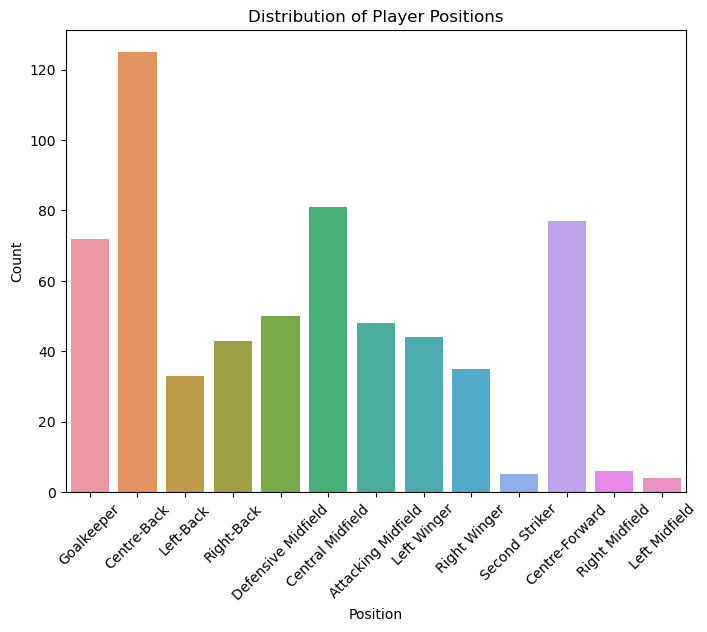

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Position', data=df)
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Age Distribution:

    Plot a histogram to visualize the age distribution of the players.
    Calculate and display the mean and median age on the histogram.

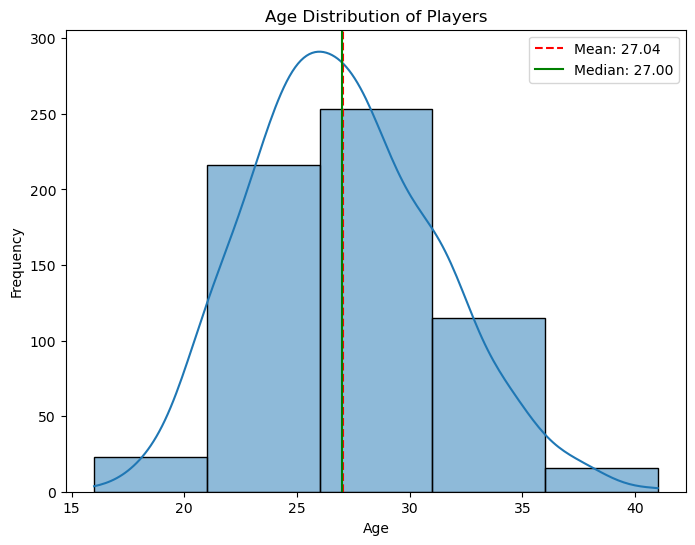

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=5, kde=True)
plt.axvline(df['Age'].mean(), color='r', linestyle='--', label=f'Mean: {df["Age"].mean():.2f}')
plt.axvline(df['Age'].median(), color='g', linestyle='-', label=f'Median: {df["Age"].median():.2f}')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Market Value by Position:

Create a box plot to compare the market value of players based on their positions.

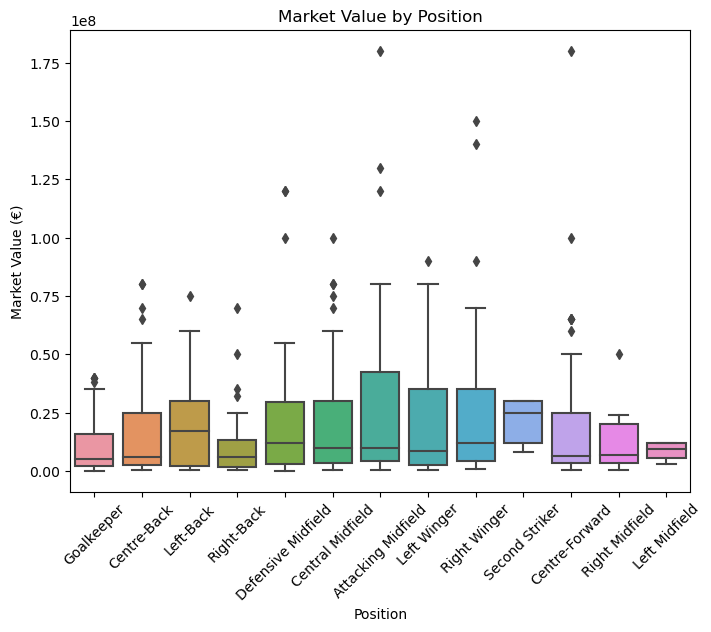

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Position', y='MarketValue', data=df)
plt.title('Market Value by Position')
plt.xlabel('Position')
plt.ylabel('Market Value (€)')
plt.xticks(rotation=45)
plt.show()

### Height Distribution by Position:

Generate a box plot showing the distribution of player heights for each position.

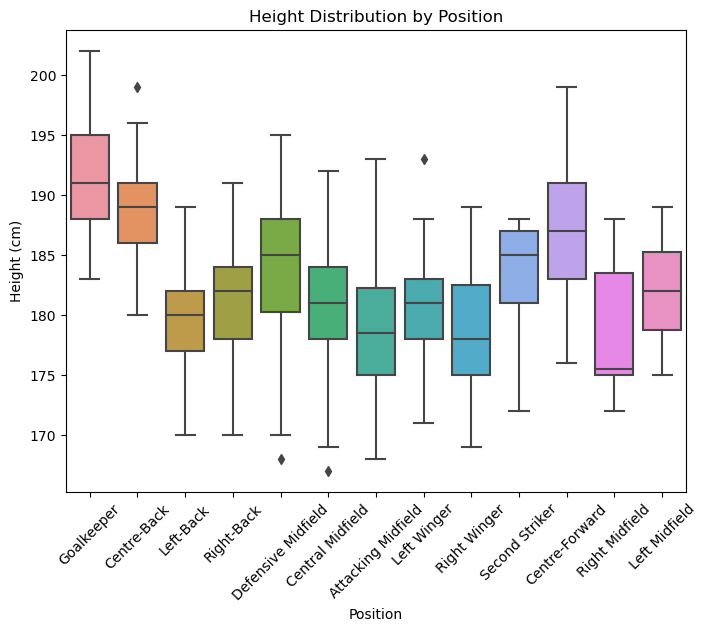

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Position', y='Height', data=df)
plt.title('Height Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45)
plt.show()

### Caps vs. Goals:

    Plot a scatter plot with the number of caps on the x-axis and the number of goals on the y-axis.
    Highlight any players with an exceptionally high number of caps or goals.


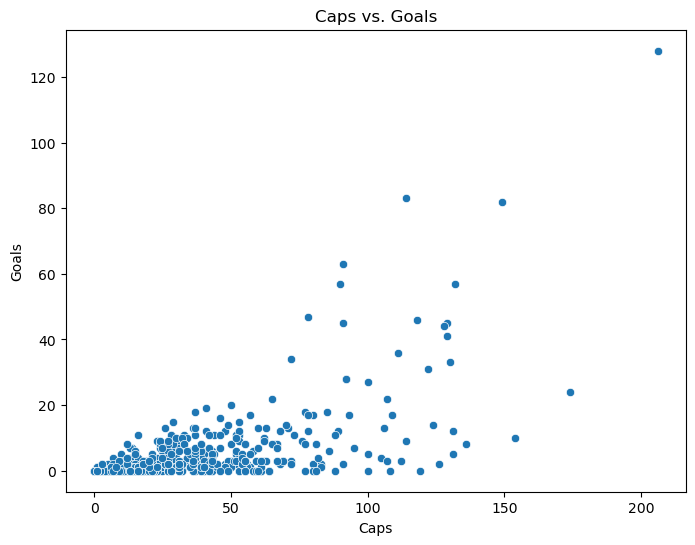

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Caps', y='Goals', data=df)
plt.title('Caps vs. Goals')
plt.xlabel('Caps')
plt.ylabel('Goals')
plt.show()

### Market Value by Age:

    Create a scatter plot showing the relationship between the players' ages and their market values.
    Fit and display a regression line to show the trend.

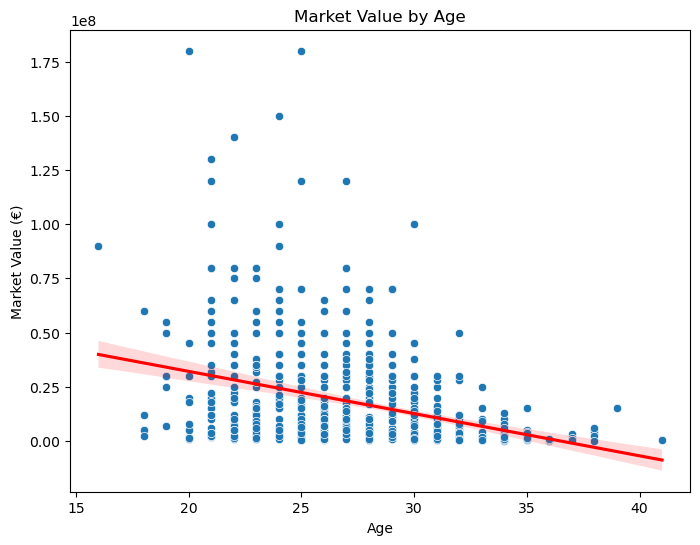

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MarketValue', data=df)
sns.regplot(x='Age', y='MarketValue', data=df, scatter=False, color='red')
plt.title('Market Value by Age')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
plt.show()

### Foot Preference Distribution:

Generate a pie chart showing the distribution of players' foot preference (right vs. left).

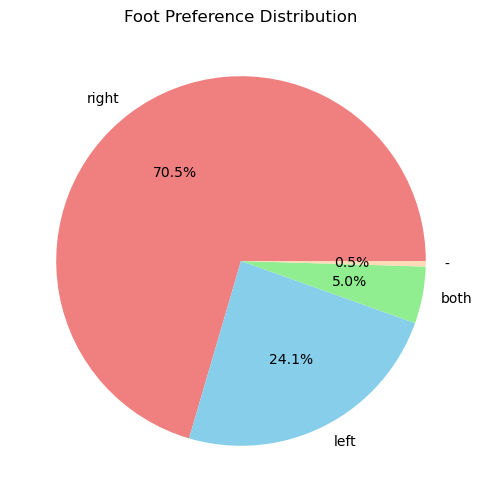

In [12]:
colors = ['lightcoral', 'skyblue', 'lightgreen', 'peachpuff']

plt.figure(figsize=(8, 6))
df['Foot'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.title('Foot Preference Distribution')
plt.ylabel('')
plt.show()


### Player Representation by Club:

Create a bar chart showing the number of players representing each club.

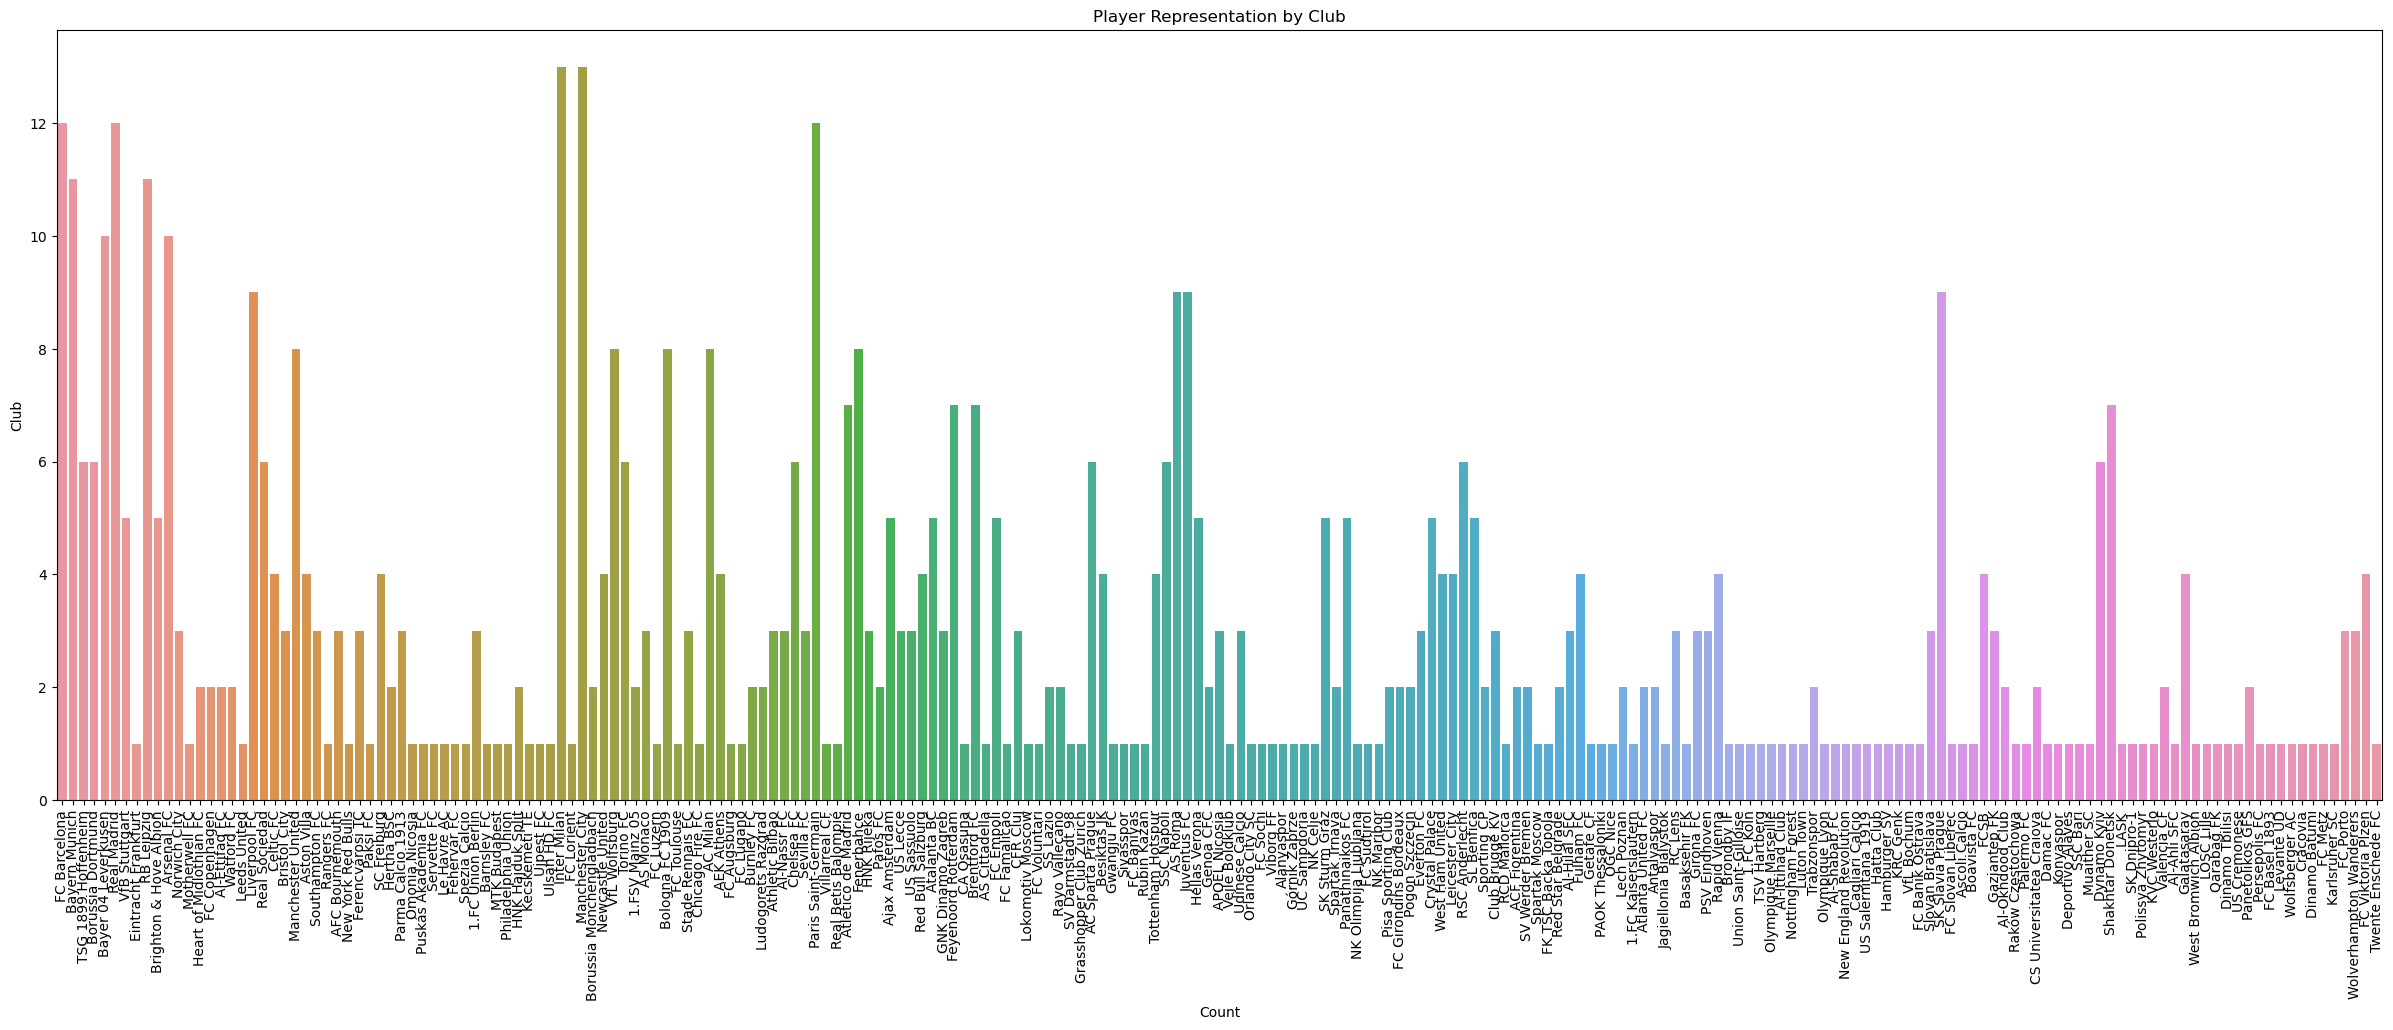

In [13]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Club', data=df)
plt.title('Player Representation by Club')
plt.xlabel('Count')
plt.ylabel('Club')
plt.xticks(rotation=90)
plt.show()

### Average Market Value of Each Club in Country

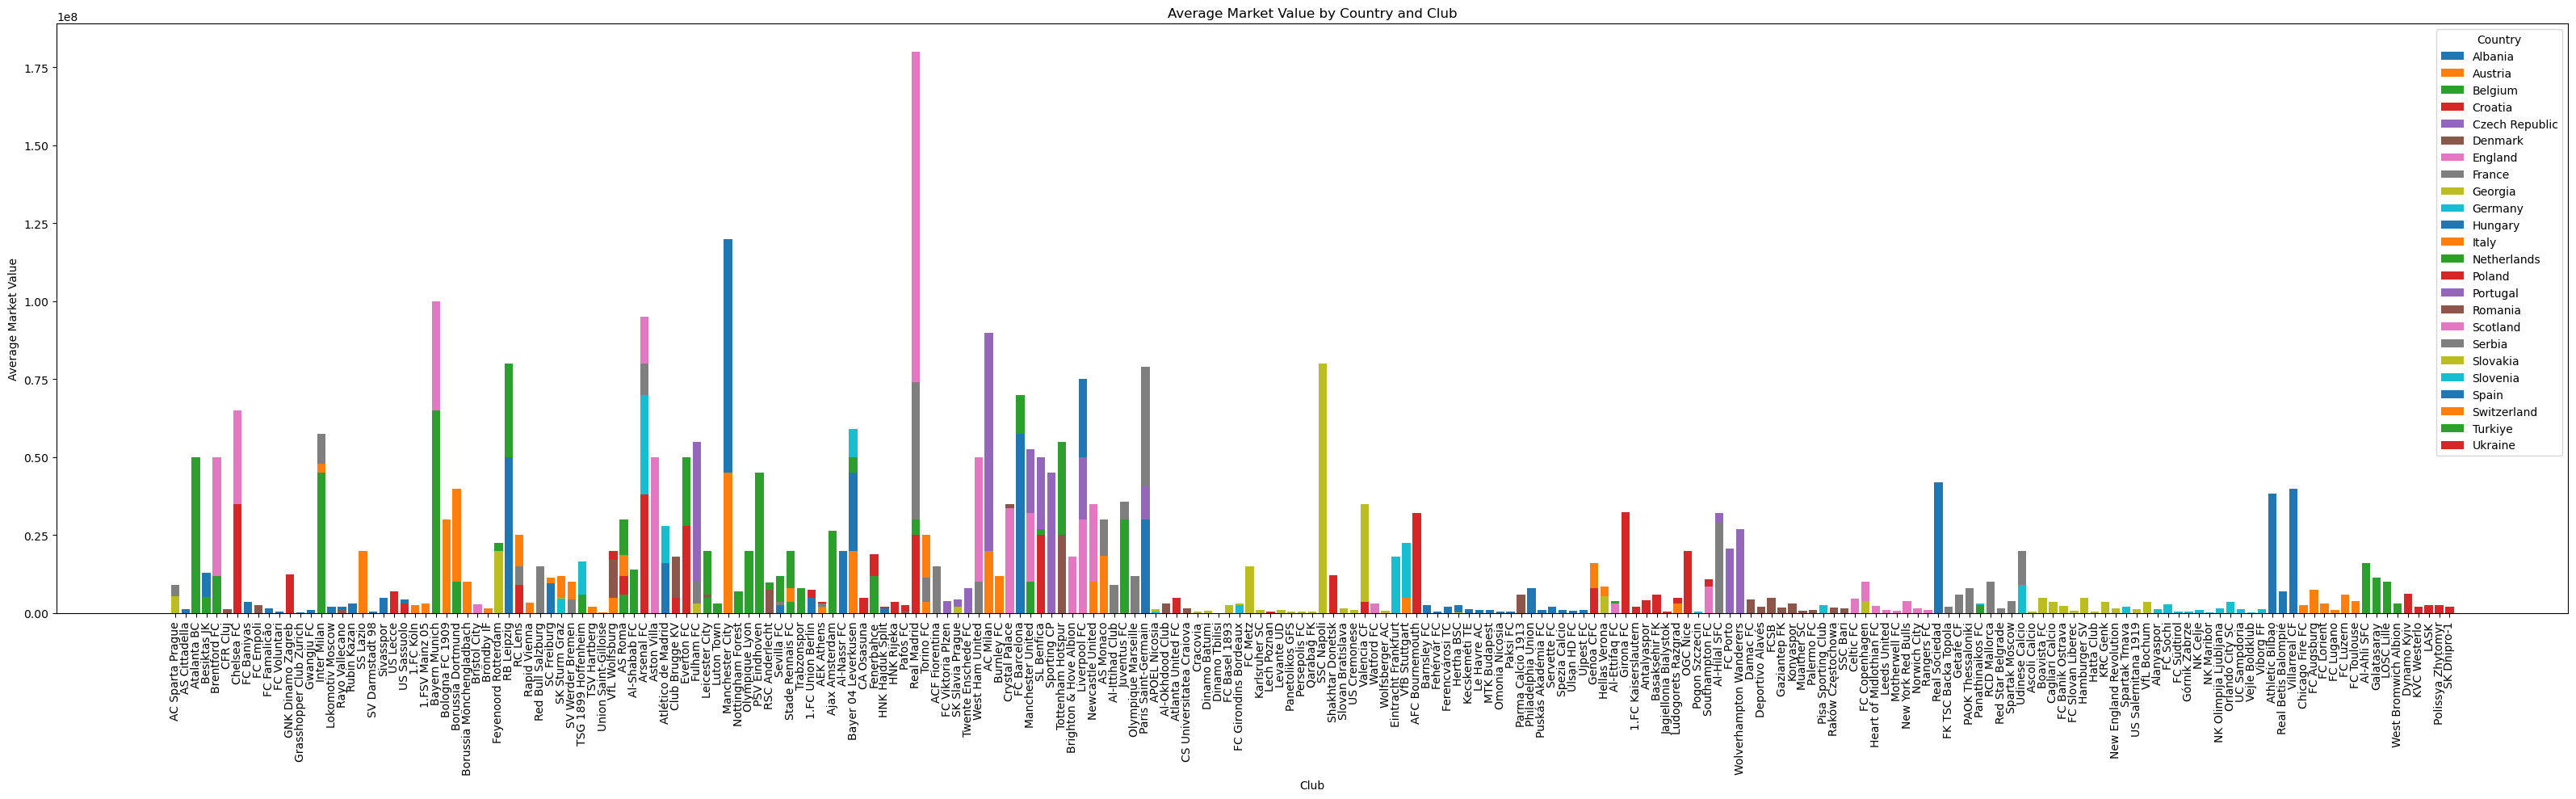

In [14]:
grouped_data = df.groupby(['Country', 'Club'])['MarketValue'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(32, 10))

# Plot average market value by country and club
for country in grouped_data['Country'].unique():
    country_data = grouped_data[grouped_data['Country'] == country]
    plt.bar(country_data['Club'], country_data['MarketValue'], label=country)

plt.title('Average Market Value by Country and Club')
plt.xlabel('Club')
plt.ylabel('Average Market Value')
plt.xticks(rotation=90)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

### Market Value Comparison for Goalkeepers:

Filter out goalkeepers and create a bar chart comparing their market values.

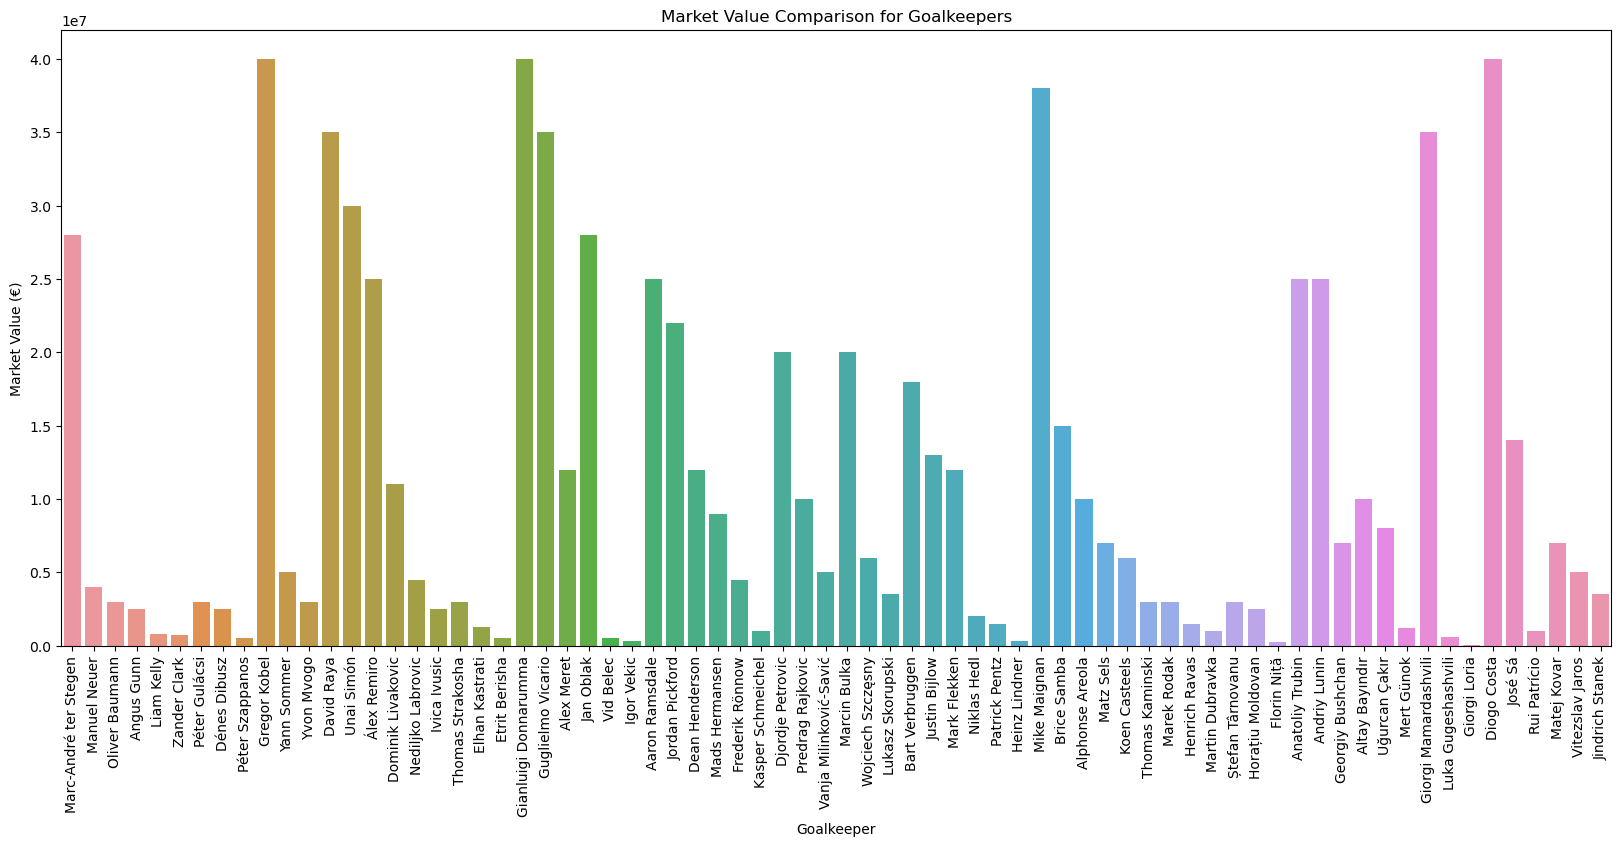

In [15]:
goalkeepers = df[df['Position'] == 'Goalkeeper']
plt.figure(figsize=(20, 8))
sns.barplot(x='Name', y='MarketValue', data=goalkeepers)
plt.title('Market Value Comparison for Goalkeepers')
plt.xlabel('Goalkeeper')
plt.ylabel('Market Value (€)')
plt.xticks(rotation=90)
plt.show()

### Country Representation:

   Since all players in the dataset are from Europe, we visualize this information in a simple pie chart, and discuss how this visualization would look how there were players from multiple countries.

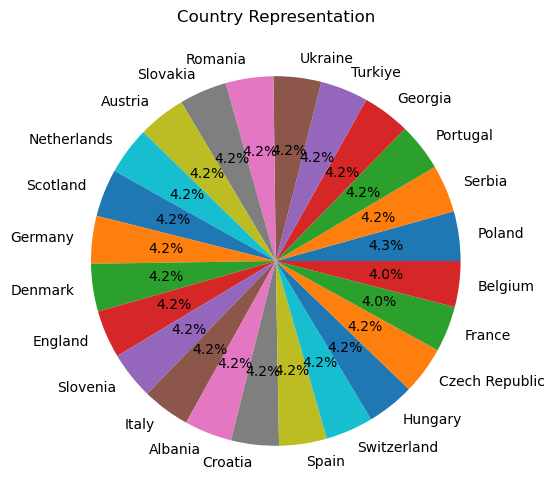

In [16]:
plt.figure(figsize=(8, 6))
df['Country'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Country Representation')
plt.ylabel('')
plt.show()


## Predictive Modeling with TensorFlow:

 We develop predictive models using TensorFlow to forecast goals of each player.

In [17]:
df_encoded = pd.get_dummies(df, columns=['Position'], drop_first=True)

# Define features and target variable
features = df_encoded[['Age', 'Height', 'Caps', 'MarketValue', 'Position_Central Midfield', 'Position_Centre-Back',
       'Position_Centre-Forward', 'Position_Defensive Midfield',
       'Position_Goalkeeper', 'Position_Left Midfield', 'Position_Left Winger',
       'Position_Left-Back', 'Position_Right Midfield',
       'Position_Right Winger', 'Position_Right-Back',
       'Position_Second Striker']]
target = df_encoded['Goals']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=2, validation_split=0.2)


Epoch 1/50


C:\Users\ashik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 82.6300 - mean_squared_error: 82.6300 - val_loss: 33.7083 - val_mean_squared_error: 33.7083
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162.4763 - mean_squared_error: 162.4763 - val_loss: 19.5928 - val_mean_squared_error: 19.5928
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.9871 - mean_squared_error: 36.9871 - val_loss: 18.6016 - val_mean_squared_error: 18.6016
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.6697 - mean_squared_error: 32.6697 - val_loss: 20.9790 - val_mean_squared_error: 20.9790
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.3647 - mean_squared_error: 26.3647 - val_loss: 16.6925 - val_mean_squared_error: 16.6925
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.1794 - mean_squared_error: 19.1794 - val_loss: 16.6941 - val_mean_squared_error: 16.6941
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.3621 - mean_squared_error: 19.3621

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0203 - mean_squared_error: 7.0203 - val_loss: 16.7120 - val_mean_squared_error: 16.7120
Epoch 46/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6366 - mean_squared_error: 5.6366 - val_loss: 15.0935 - val_mean_squared_error: 15.0935
Epoch 47/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8951 - mean_squared_error: 5.8951 - val_loss: 17.1333 - val_mean_squared_error: 17.1333
Epoch 48/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6514 - mean_squared_error: 4.6514 - val_loss: 15.8717 - val_mean_squared_error: 15.8717
Epoch 49/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5373 - mean_squared_error: 4.5373 - val_loss: 15.1456 - val_mean_squared_error: 15.1456
Epoch 50/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6863 - mean_squared_error: 3.6863 - val_loss: 16.3824 - val_mean_squared_error: 16.3824


### Model Evaluation:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.7747 - mean_squared_error: 16.9204
Mean Squared Error on Test Set: 17.29346466064453


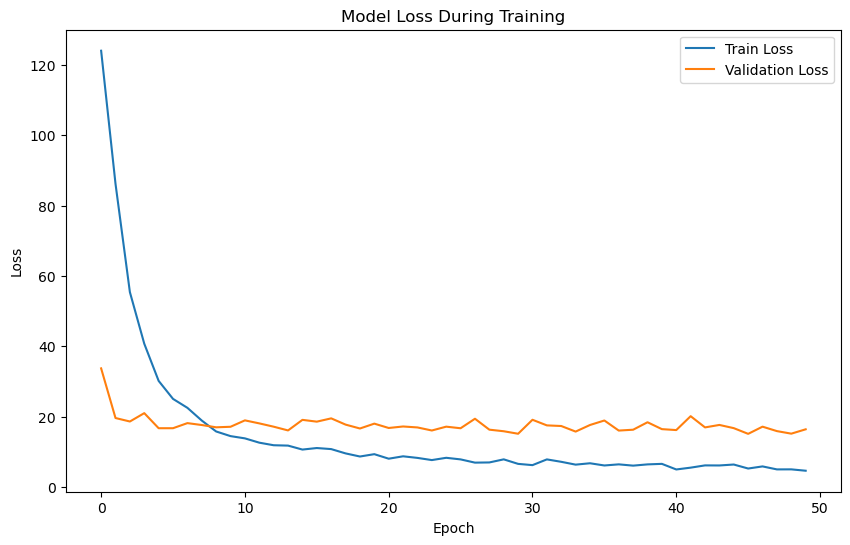

In [19]:
# Evaluate the model on the test set
loss, mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
df_encoded.columns

Index(['Name', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals', 'MarketValue',
       'Country', 'Position_Central Midfield', 'Position_Centre-Back',
       'Position_Centre-Forward', 'Position_Defensive Midfield',
       'Position_Goalkeeper', 'Position_Left Midfield', 'Position_Left Winger',
       'Position_Left-Back', 'Position_Right Midfield',
       'Position_Right Winger', 'Position_Right-Back',
       'Position_Second Striker'],
      dtype='object')

### Predict the Market value

To predict the market value of a football player based on various features such as age, position, height, number of caps, goals, and more using a neural network model with TensorFlow.

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scaling the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


In [22]:
# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train_scaled, epochs=50, batch_size=2, validation_split=0.2)


Epoch 1/50


C:\Users\ashik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6290 - mean_squared_error: 0.6290 - val_loss: 0.2174 - val_mean_squared_error: 0.2174
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3617 - mean_squared_error: 0.3617 - val_loss: 0.1506 - val_mean_squared_error: 0.1506
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2563 - mean_squared_error: 0.2563 - val_loss: 0.1720 - val_mean_squared_error: 0.1720
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2441 - mean_squared_error: 0.2441 - val_loss: 0.2149 - val_mean_squared_error: 0.2149
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1705 - mean_squared_error: 0.1705 - val_loss: 0.1873 - val_mean_squared_error: 0.1873
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 0.1858 - val_mean_squared_error: 0.1858
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.1571 - val_me

Epoch 46/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1120 - val_mean_squared_error: 0.1120
Epoch 47/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1091 - val_mean_squared_error: 0.1091
Epoch 48/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1237 - val_mean_squared_error: 0.1237
Epoch 49/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 50/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1532 - val_mean_squared_error: 0.1532


### Evaluate the model on the test set

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1771 - mean_squared_error: 0.1785  
Mean Squared Error on Test Set: 0.17389096319675446


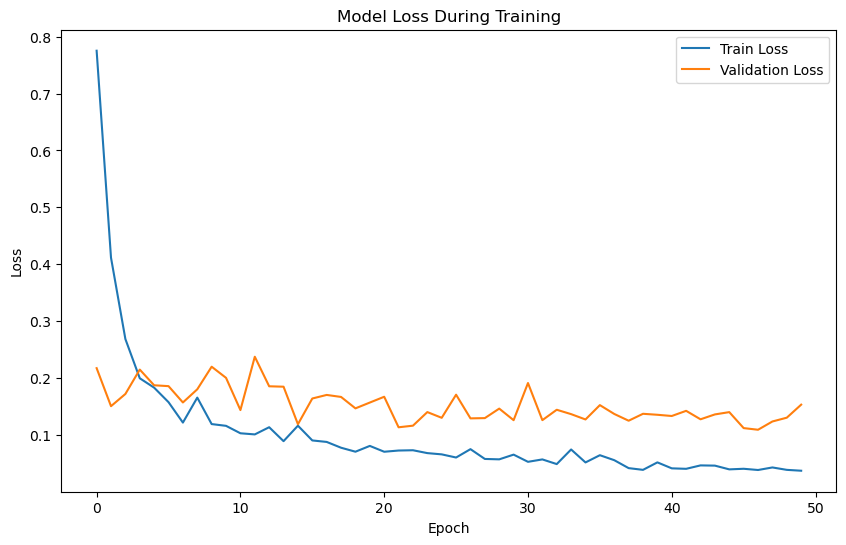

In [23]:
# Evaluate the model on the test set
loss, mse = model.evaluate(X_test, y_test_scaled)
print(f'Mean Squared Error on Test Set: {mse}')

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


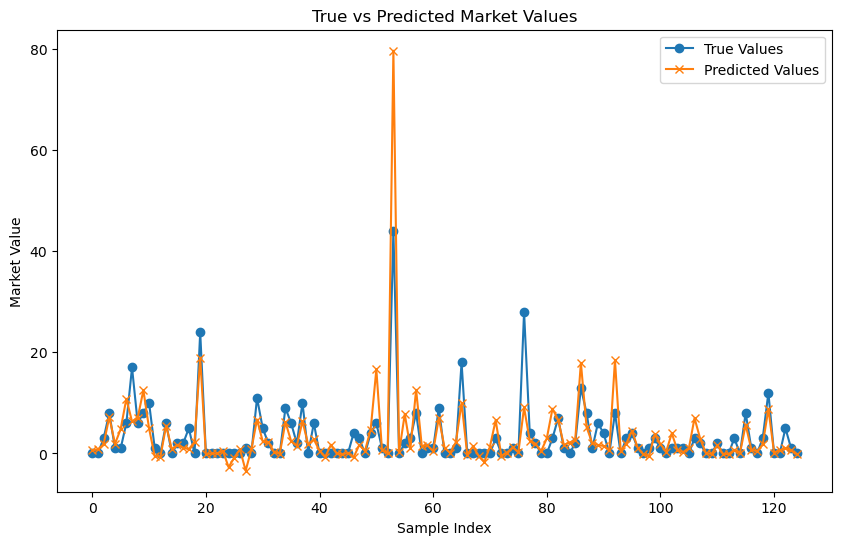

In [24]:
# Inverse transform the predictions and true values for comparison
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_scaled)

# Compare true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='True Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.legend()
plt.title('True vs Predicted Market Values')
plt.xlabel('Sample Index')
plt.ylabel('Market Value')
plt.show()

## Outcomes
The project provided a foundational understanding of predicting football player market values using machine learning and the importance of data visualization in interpreting and communicating findings. While the current dataset posed limitations, the methodologies and approaches outlined can be extended to more comprehensive datasets for more accurate and insightful predictions. Future work should focus on expanding the dataset and exploring advanced modeling techniques to achieve better performance and deeper insights.